<a href="https://colab.research.google.com/github/jagadish432/mlzoomcamp/blob/main/CarPrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2) Machine Learning for Regression

# 2.1 Data Preparation

In [1]:
import pandas as pd
import numpy as np

In [7]:
data = "https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/refs/heads/master/chapter-02-car-price/data.csv"

In [8]:
!wget $data

--2024-10-06 16:18:18--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/refs/heads/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: ‘data.csv’

data.csv            100%[===================>]   1.41M  --.-KB/s    in 0.07s   

2024-10-06 16:18:18 (21.5 MB/s) - ‘data.csv’ saved [1475504/1475504]



In [9]:
ls

data.csv  sample_data/


In [10]:
ls sample_data/

anscombe.json*               california_housing_train.csv  mnist_train_small.csv
california_housing_test.csv  mnist_test.csv                README.md*


In [11]:
df = pd.read_csv('data.csv')

In [12]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [13]:
# the column names are not uniform interms of spaces and cases, so let's fix that

df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [14]:
df.columns = df.columns.str.lower().str.replace(" ", "_")

In [15]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [16]:
df.dtypes

,0
make,object
model,object
year,int64
engine_fuel_type,object
engine_hp,float64
engine_cylinders,float64
transmission_type,object
driven_wheels,object
number_of_doors,float64
market_category,object


In [17]:
df.dtypes[df.dtypes=="object"]

,0
make,object
model,object
engine_fuel_type,object
transmission_type,object
driven_wheels,object
market_category,object
vehicle_size,object
vehicle_style,object


In [21]:
df.dtypes[df.dtypes=="object"].index

Index(['make', 'model', 'engine_fuel_type', 'transmission_type',
       'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style'],
      dtype='object')

In [19]:
string_columns = list(df.dtypes[df.dtypes=="object"].index)

In [23]:
string_columns

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [24]:
for column in string_columns:
  df[column] = df[column].str.lower().str.replace(" ", "_")

df.dtypes

,0
make,object
model,object
year,int64
engine_fuel_type,object
engine_hp,float64
engine_cylinders,float64
transmission_type,object
driven_wheels,object
number_of_doors,float64
market_category,object


# 2.2 exploratory data analysis

In [25]:
for col in df.columns:
  print(col)
  print(df[col].head(), end="\n\n")

make
0    bmw
1    bmw
2    bmw
3    bmw
4    bmw
Name: make, dtype: object

model
0    1_series_m
1      1_series
2      1_series
3      1_series
4      1_series
Name: model, dtype: object

year
0    2011
1    2011
2    2011
3    2011
4    2011
Name: year, dtype: int64

engine_fuel_type
0    premium_unleaded_(required)
1    premium_unleaded_(required)
2    premium_unleaded_(required)
3    premium_unleaded_(required)
4    premium_unleaded_(required)
Name: engine_fuel_type, dtype: object

engine_hp
0    335.0
1    300.0
2    300.0
3    230.0
4    230.0
Name: engine_hp, dtype: float64

engine_cylinders
0    6.0
1    6.0
2    6.0
3    6.0
4    6.0
Name: engine_cylinders, dtype: float64

transmission_type
0    manual
1    manual
2    manual
3    manual
4    manual
Name: transmission_type, dtype: object

driven_wheels
0    rear_wheel_drive
1    rear_wheel_drive
2    rear_wheel_drive
3    rear_wheel_drive
4    rear_wheel_drive
Name: driven_wheels, dtype: object

number_of_doors
0    2.0
1   

In [26]:
for col in df.columns:
  print(col)
  print(df[col].unique()[:5]) # first five unique values
  print(df[col].nunique(), end="\n\n") # total count of unique values per column

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

In [27]:
import matplotlib.pyplot as plt
import seaborn as sbn

%matplotlib inline

<Axes: xlabel='msrp', ylabel='Count'>

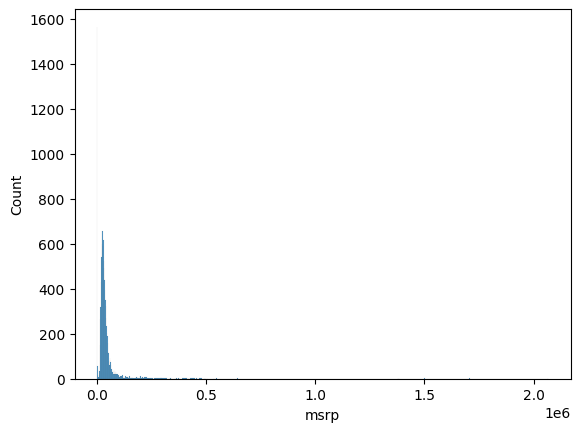

In [28]:
sbn.histplot(df.msrp)

<Axes: xlabel='msrp', ylabel='Count'>

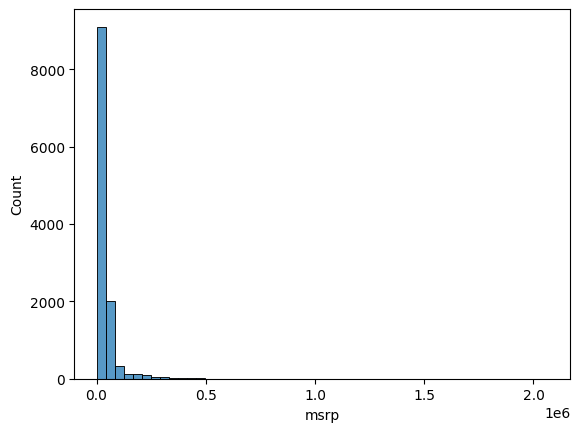

In [29]:

sbn.histplot(df.msrp, bins=50)

<Axes: xlabel='msrp', ylabel='Count'>

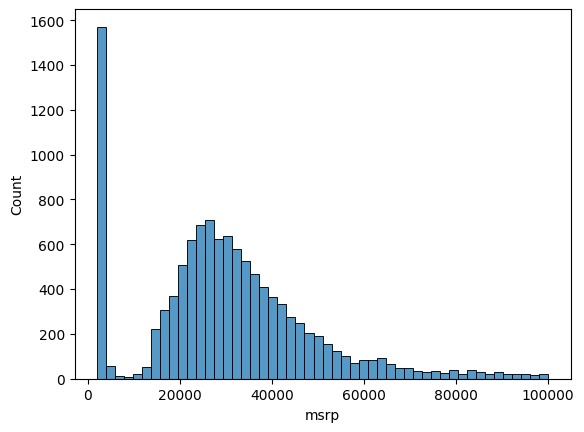

In [30]:
sbn.histplot(df.msrp[df.msrp < 100000], bins=50)

In [31]:
np.log([1, 10, 1000, 100000])

array([ 0.        ,  2.30258509,  6.90775528, 11.51292546])

In [32]:
np.log1p([0,1,10,1000,100000]) # 1p stands for +1 for all values in the list

array([ 0.        ,  0.69314718,  2.39789527,  6.90875478, 11.51293546])

In [33]:
price_logs = np.log1p(df.msrp)
price_logs

,msrp
0,10.739349
1,10.612779
2,10.500977
3,10.290483
4,10.448744
...,...
11909,10.739024
11910,10.945018
11911,10.832122
11912,10.838031


<Axes: xlabel='msrp', ylabel='Count'>

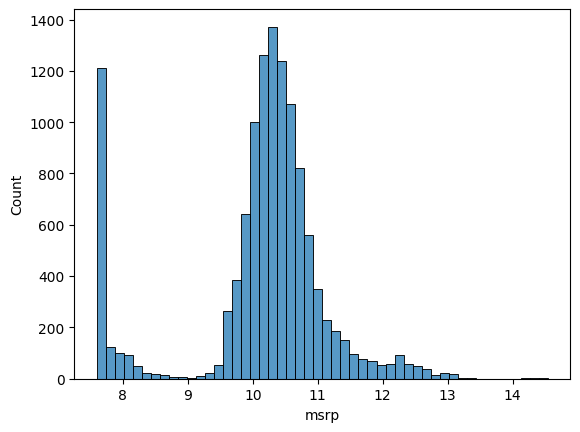

In [34]:
sbn.histplot(price_logs, bins=50)
# the below pattern is a NORMAL DISTRIBUTION
# we have a clear centre of distribution and we have left and right values as well


In [35]:
# Check the missing values
df.isnull()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11910,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11911,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11912,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [36]:
df.isnull().sum()

,0
make,0
model,0
year,0
engine_fuel_type,3
engine_hp,69
engine_cylinders,30
transmission_type,0
driven_wheels,0
number_of_doors,6
market_category,3742


# 2.3) setting up the validation frameowrk

In [37]:
len(df)

11914

In [38]:
N = len(df)
val_records = int(N * 0.2) # 20%
test_records = int(N * 0.2) # 20%
train_records = N - test_records - val_records # remaining %
print(train_records, val_records, test_records)

7150 2382 2382


In [39]:
# As the data might be in order in the original dataset, we can shuffle the dataset

# generate the indices of the desired number i.e., N
idx = np.arange(N)
idx


array([    0,     1,     2, ..., 11911, 11912, 11913])

In [40]:
# shuffle those indices, but use the seed to be able to reproduce the
# indices order to reproduce on any system
np.random.seed(2)
np.random.shuffle(idx)
idx

array([2735, 6720, 5878, ..., 6637, 2575, 7336])

In [41]:
# Use these shuffled indices as help to pick the random elements
# from the actual dataset

train_df = df.iloc[idx[: train_records]]
print(len(train_df))

val_df = df.iloc[idx[train_records: train_records + val_records]]
print(len(val_df))

test_df = df.iloc[idx[train_records + val_records:]]
print(len(test_df))




7150
2382
2382


In [42]:
train_df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260


In [43]:
# reset the indexes to have better indexing
train_df.reset_index(drop=True) # shuffled index not needed for us
val_df.reset_index(drop=True)
test_df.reset_index(drop=True)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,gmc,vandura,1994,regular_unleaded,165.0,6.0,automatic,rear_wheel_drive,3.0,NaN,compact,cargo_van,20,15,549,2000
1,mercedes-benz,600-class,1993,regular_unleaded,389.0,12.0,automatic,rear_wheel_drive,2.0,luxury,large,coupe,15,11,617,3211
2,toyota,venza,2013,regular_unleaded,268.0,6.0,automatic,all_wheel_drive,4.0,"crossover,performance",midsize,wagon,25,18,2031,31120
3,volvo,740,1992,regular_unleaded,114.0,4.0,automatic,rear_wheel_drive,4.0,luxury,midsize,sedan,26,18,870,2000
4,ford,crown_victoria,2010,flex-fuel_(unleaded/e85),224.0,8.0,automatic,rear_wheel_drive,4.0,flex_fuel,large,sedan,24,16,5657,29905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2377,chevrolet,chevy_van,1998,regular_unleaded,200.0,6.0,automatic,rear_wheel_drive,3.0,NaN,midsize,cargo_van,18,13,1385,2052
2378,subaru,xv_crosstrek,2014,regular_unleaded,160.0,4.0,automatic,all_wheel_drive,4.0,"crossover,hybrid",compact,4dr_suv,33,29,640,25995
2379,dodge,magnum,2006,regular_unleaded,250.0,6.0,automatic,all_wheel_drive,4.0,NaN,large,wagon,22,15,1851,29100
2380,honda,civic,2016,regular_unleaded,174.0,4.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,42,31,2202,22200


In [44]:
# As the train, validation and test data is ready
# we now need to prepare the X,Y and Xv Yv and Xtest, Ytest

# in order to get just the values,
#we fetch only values i.e., numpy array from the pandas df
y_train = np.log1p(train_df.msrp.values) # Y
y_val = np.log1p(val_df.msrp.values) # Yv
y_test = np.log1p(test_df.msrp.values) # Ytest

In [45]:
# Deleting the msrp column from original dataset as
# that is our target variable and we obviously wouldn't and shouldn't
# use the target variable in our model building process
# to determine the target variable :D

del train_df['msrp']
del val_df['msrp']
del test_df['msrp']

# 2.4) Linear Regression
The Training Part

In [ ]:
# we will build a model in the below form
# g(X) ~ y
# y is msrp price, X is feature matrix
# g is model, Linear Regression

In [ ]:
# let's see the below for now
# g(Xi) ~ Yi
# Xi is just one car, and Yi is its price
# Xi = (Xi1, Xi2, ..... Xin) i.e., a vector
# g(Xi1, Xi2, ....Xin) ~ Yi , here g predicts a closer price


In [46]:
# example training
# pick some random record
train_df.iloc[10]

,7557
make,rolls-royce
model,phantom_drophead_coupe
year,2015
engine_fuel_type,premium_unleaded_(required)
engine_hp,453.0
engine_cylinders,12.0
transmission_type,automatic
driven_wheels,rear_wheel_drive
number_of_doors,2.0
market_category,"exotic,luxury,performance"


In [47]:
# let's take engine_hp, city_mpg and popularity .. here to explain
Xi = [453, 11, 86]
# here i is 10, as we picked the 10th record :)

In [48]:
def g(Xi):
  # do something
  return 10000


In [49]:
g(Xi)

10000

In [ ]:
# g(Xi) = W0 + W1. X1 + W2. X2 + W3. X3
# W is some weight here
# g(Xi) = W0 + simga J from 0 to N-1 for product of W and Xi each

In [ ]:
# the weights W0, W1, W2, W3 are
# need to be set-up by us based on the criticalitiy of the feature
# they are multiplied with, how impact they provide in the target price
# in this case the final car price

# 2.5 Linear Regression Vector Form

In [50]:
x1 = [1, 148, 24, 1385]
x2 = [1, 132, 25, 2031]
x3 = [1, 453, 11, 86]

X = [x1, x2, x3]
X

[[1, 148, 24, 1385], [1, 132, 25, 2031], [1, 453, 11, 86]]

In [51]:
X = np.array(X)
X # feature matrix 'X'

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [52]:
w0 = 7.17
w = [0.01, 0.04, 0.002]
w_new = [w0] + w

w_new # weights

[7.17, 0.01, 0.04, 0.002]

In [53]:
X.dot(w_new) # this yields predictions

array([12.38 , 13.552, 12.312])

# 2.6) Training Linear Regression: Normal Equation

In [54]:
#we have the below process

#g(X) = X.w

# here X.w will be close to y (target matrix),
# however we cannot make Xw = y, but we can make Xw ~ y
# so we need to solve the system 'w' here

# if inverse exists for the feature matrix X, then we could say
# X^-1 (X to pwer of -1)
# X^-1 . X . w = X^-1 . y
# after cancelling X and X^-1 product, we will be left with
# w = X^-1 . y, but all this happends if X inverse exists

# however, X is a rectangular matrix i..e, m * m-1 or m * m+1, so inverse
# cannot exists for these kind of matrix, so the solution doesn't exist
# but we can find the ppaorximate solution

# X^T . X  ==> GRAM MATRIX (product of X transpose and X) => which will be a
# square matrix i.e., m*m, so inverse exists for this

# X^T . X . w = X^T . y

# So, now we can comeup with the below equation
# (X^T . X)^-1 . (X^T . X) . w = (X^T . X)^-1 . X^T . y

# after cancelling the inverse and its normal product, we will be left with

# w = (X^T . X)^-1 . X^T . y, gives us way to find w

# w is not exact solution, but it can be a closest possible solution


In [88]:


X = [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38, 54, 185],
    [142, 25, 431],
    [453, 31, 86],


    ]

X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [62]:
# As per the above normal equation, we need to compute
# w = (X^T . X)^-1 . X^T . y

# X^T . X is the GRAM MATRIX

XTX = X.T.dot(X)
XTX_inv = np.linalg.inv(XTX)
XTX_inv

array([[ 2.35803616e-06, -1.46900642e-05,  8.00007928e-09],
       [-1.46900642e-05,  2.94487947e-04, -3.84130606e-06],
       [ 8.00007928e-09, -3.84130606e-06,  2.28083884e-07]])

In [66]:
XTX.dot(XTX_inv).round(1)

array([[ 1.,  0.,  0.],
       [-0.,  1.,  0.],
       [ 0.,  0.,  1.]])

In [68]:
y = [100, 200, 150, 250, 100, 200, 150, 250, 120]
w = XTX_inv.dot(X.T).dot(y)
w

array([0.26190562, 3.06101252, 0.03696909])

In [69]:
# the above w is the weights suitable for this model
# however, this won't be the perfect solution but rather the closest
# values
# also, we can add a baseline weight w0 i.e., minimum value added to the
# car predicition price

# let's add 1's to the feature matriz for that calculation
X.shape

(9, 3)

In [71]:
ones = np.ones(X.shape[0])
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [72]:
# eg:
np.column_stack([ones, ones])

array([[1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.]])

In [82]:
X = np.column_stack([ones, X])
X

array([[1.000e+00, 1.480e+02, 2.400e+01, 1.385e+03],
       [1.000e+00, 1.320e+02, 2.500e+01, 2.031e+03],
       [1.000e+00, 4.530e+02, 1.100e+01, 8.600e+01],
       [1.000e+00, 1.580e+02, 2.400e+01, 1.850e+02],
       [1.000e+00, 1.720e+02, 2.500e+01, 2.010e+02],
       [1.000e+00, 4.130e+02, 1.100e+01, 8.600e+01],
       [1.000e+00, 3.800e+01, 5.400e+01, 1.850e+02],
       [1.000e+00, 1.420e+02, 2.500e+01, 4.310e+02],
       [1.000e+00, 4.530e+02, 3.100e+01, 8.600e+01]])

In [83]:
XTX = X.T.dot(X)


In [84]:
XTX_inv = np.linalg.inv(XTX)
XTX_inv

array([[ 3.30686958e+00, -5.39612291e-03, -6.21325581e-02,
        -6.61016816e-04],
       [-5.39612291e-03,  1.11633857e-05,  8.66973393e-05,
         1.08664195e-06],
       [-6.21325581e-02,  8.66973393e-05,  1.46189255e-03,
         8.57849603e-06],
       [-6.61016816e-04,  1.08664195e-06,  8.57849603e-06,
         3.60215866e-07]])

In [85]:
w_full = XTX_inv.dot(X.T).dot(y)

In [86]:
w0 = w_full[0]
w0

300.0677669255554

In [87]:
w = w_full[1:]
w

array([-0.22774253, -2.5769413 , -0.02301206])

In [89]:
def train_linear_regression(X):
  ones = np.ones(X.shape[0])
  X = np.column_stack([ones, X])
  XTX = X.T.dot(X)
  XTX_inv = np.linalg.inv(XTX)
  w_full = XTX_inv.dot(X.T).dot(y)

  return w_full[0], w_full[1:]

train_linear_regression(X)



(300.0677669255554, array([-0.22774253, -2.5769413 , -0.02301206]))

# 2.7) Car price baseline model